# IBARG Computational Team Screening Test

## Instructions

- You are encouraged to "cheat" during this screening test. That is, please use google and documentations as much as possible to learn about the modules you are about to use. 

- You are free to use any code snippets from some online source, but it is MANDATORY to mention the source and cite the author in the code using comments. 

- Make sure you understand the code snippets you are copying as it will help you in the future tasks. 

- You can submit your entries by creating a GitHub repository and making a ReadMe file for all the plots and diagrams.

- Please add comments in your code to make us aware of your thinking process and what is being done. 

- This is supposed to be a screening cum learning task, hence if you feel stuck anywhere or feel lost, please feel free to contact your peers or me. 

- You can do this assignment in Jupyter Notebook on your device, or in Google Colab. 

- If you are using Google Colab, please learn how to "Mount your Google Drive" in order to access data directly from the Google Colab. 


- **Submission Deadline: 20th Feb 2023, 2359 IST**

## Tasks

In this assignment, you will be dealing with three different computational astronomy approaches:

#### 1. Data Visualization

For this part, you will be using the Gaia data of the stars contained in a spherical volume around the center of our galaxy to visualize and quantify their motion using computational approach to extract the "Physics" from the data.

#### 2. Data Cleaning and Extraction
Here, you will be given rather "dirty" FITS file, along with the bias and flats. You are supposed to perform the appropriate cleaning steps and produce a science image.

#### 3. Data Interpretation

For this part you will be given a free will to query the data of your choice form any data release of any telescope and present an intuitive visualization and an interpretation of the "visualized data".

# 1. Data Visualization

The Gaia Telescope, since its launch has produced precise measurements about a billion stars and other source in our milky way and outside. This has lead to the creation of one of the most comprehensive and dynamic 3D maps of the Milky way till date. 

Here the dataset is contained in a `CSV` file named `SphereData.csv`. It contains all the parameters of the stars in the central region of the milky way around our supermassive black hole. Sagittarius A*.

You are supposed to read this data into a workable dataset using any Data base management library of your choice such as `pandas`, `numpy` etc, and create visually revealing plots and diagrams which would help us know something about the stars.

###  Tasks

- Create RA and DEC distribution of the data.
- Create a distance distribution and comment whether these stars "actually" lie around the galactic center. Discard any stars which do not seem to fit the norm. 
- Make Density scatter plots of the Proper motion in RA and DEC

### Other 

There are several parameters provided for each star in the dataset. So if you wish to make plots between some other values such as "Radial velocity" versus "distance" or "Magnitude" v/s "Position" etc, you are free to do so. Make as many plots as you find interesting and write a few lines about what the plot "demonstrates" or what science is contained in those plots.

In [18]:
######################################################################################
# -- THIS IS THE DATA QUERY WHICH WAS SENT TO GAIA SERVER TO ACQUIRE THE SPHERE DATA. CSV
######################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import ascii
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
from scipy import stats
import sklearn
import seaborn as sns
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde
import math

#Coordinates of the Galactic Center
c = SkyCoord('17h45m40.04s', '-29d00m28.1s', frame='icrs')

#RA and DECof the Galactic Center
c_ra = 266.41683333
c_dec = -29.00780556

#Radius of Selection in Parsecs
r_s = 300
width = np.degrees(np.arctan(r_s / 8000))
print('The required width of window is: ', round(2 * width, 3), "degrees")

a1 = round(c_ra + width,3)
a2 = round(c_ra - width,3)
b1 = round(c_dec + width,3)
b2 = round(c_dec - width,3)
print(f'\nThe required RA values are: {a2} and {a1}')
print(f'The required DEC values are: {b2} and {b1}')

c1 = round(1000/(8000+r_s),4)
c2 = round(1000/(8000-r_s),4)
print(f'\nThe required parallax window is: {c1} and {c2}')

query = f'''select g.source_id, g.ra, g.ra_error, g.dec, g.dec_error, g.parallax,g.parallax_over_error,g.bp_rp,
g.pm,g.pmra,g.pmra_error,g.pmdec,g.pmdec_error,g.phot_g_mean_mag,g.phot_bp_mean_mag,g.phot_rp_mean_mag,g.radial_velocity,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf + h.classprob_dsc_combmod_binarystar as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between {a2} and {a1} and
g.dec between {b2} and {b1} and
g.parallax between {c1} and {c2}
order by g.phot_g_mean_mag desc, comb desc'''


job = Gaia.launch_job_async(query)
r = job.get_results()

print('\nTotal number of stars queried: ',len(r))

The required width of window is:  4.295 degrees

The required RA values are: 264.269 and 268.564
The required DEC values are: -31.155 and -26.86

The required parallax window is: 0.1205 and 0.1299
INFO: Query finished. [astroquery.utils.tap.core]

Total number of stars queried:  29551


In [19]:
r

source_id,ra,ra_error,dec,dec_error,parallax,parallax_over_error,bp_rp,pm,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,radial_velocity,comb
,deg,mas,deg,mas,mas,,mag,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mag,km / s,
int64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32
4056086781454203648,268.4539252277803,0.10652448,-30.84655696230511,0.09010858,0.12441890164649606,1.1539185,--,4.067288,-1.1328468202174824,0.13384484,-3.9063397007615173,0.091316335,--,--,--,--,--
4057323529992762368,267.95032082438104,0.13620135,-29.198783792442235,0.11477398,0.12560162275138925,0.7876919,--,10.326191,-5.462175344676746,0.15398823,-8.763267979112076,0.11158696,--,--,15.703587,--,1.0
4060986239454576512,265.6510174675305,0.12266209,-27.074059699507853,0.09751666,0.12189756609077512,0.80960643,--,8.376596,-5.696467462253519,0.14380091,-6.141467414069,0.092029355,--,--,14.741826,--,1.0
4057382010307715456,268.00472214871263,1.3732183,-28.52543230338631,1.0444623,0.12692320369329507,0.13885072,--,4.3830094,-3.8544088780039956,1.099409,-2.086696831171772,0.85637975,--,--,17.799229,--,1.0
4057733166811672448,267.0141804741428,1.0230968,-27.530267270619465,0.8578385,0.12110881097625836,0.13291034,--,2.1151037,2.0748511382821744,1.3691678,-0.41067847661840473,0.84858006,--,--,18.667568,--,1.0
4060420922968098688,264.385628601368,0.51193565,-28.4629062937237,0.3651679,0.12816237812236947,0.24350531,--,11.289518,-6.3178433340849605,0.6646254,-9.356178933808277,0.43642554,--,--,18.095808,--,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056432646410629504,267.53179667519703,0.06832545,-29.985902943871363,0.053050347,0.12719834373203,1.7382756,5.31406,1.8454652,0.04343170070353246,0.08263068,-1.8449540233146546,0.051608015,13.079323,16.84191,11.527849,-19.094297,1.0


In [20]:
# Importing all the required modules and libraries here
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import os
import pandas as pd

In [21]:
# Importing the csv dataset
path_csv = '/home/relativelyhuman/Desktop/IBAC_RG/Data/SphereData.csv'
dataset = pd.read_csv(path_csv)

### RA v/s DEC distribution

In [22]:
#let us see the what data does the csv file hold 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29551 entries, 0 to 29550
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           29551 non-null  int64  
 1   source_id            29551 non-null  int64  
 2   ra                   29551 non-null  float64
 3   ra_error             29551 non-null  float64
 4   dec                  29551 non-null  float64
 5   dec_error            29551 non-null  float64
 6   parallax             29551 non-null  float64
 7   parallax_over_error  29551 non-null  float64
 8   bp_rp                28008 non-null  float64
 9   pm                   29551 non-null  float64
 10  pmra                 29551 non-null  float64
 11  pmra_error           29551 non-null  float64
 12  pmdec                29551 non-null  float64
 13  pmdec_error          29551 non-null  float64
 14  phot_g_mean_mag      29123 non-null  float64
 15  phot_bp_mean_mag     28021 non-null 

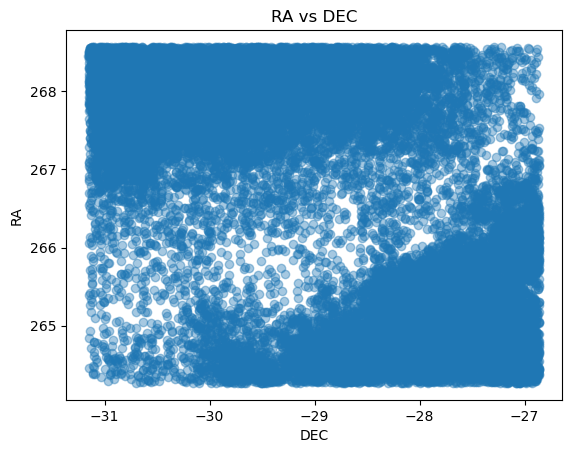

In [23]:
#now we want a distribution between ra (y axis) and dec (x axis)

ra = dataset['ra']
dec = dataset['dec']

plt.scatter(dec,ra,alpha=0.4)
plt.xlabel('DEC')
plt.ylabel('RA')
plt.title('RA vs DEC')
plt.show()

This gives us an idea of how the night sky looks around the region near the Saggittarius A*

### Distance Distribution

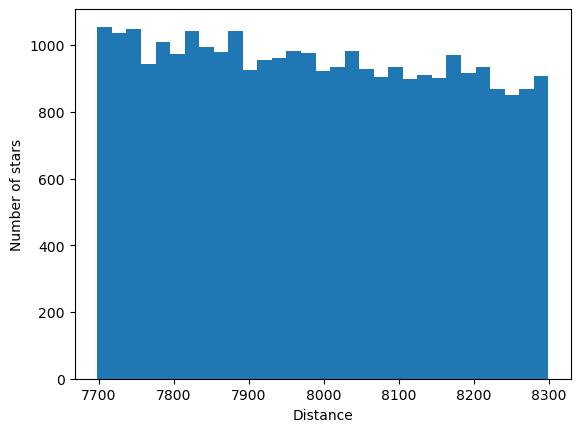

0        8037.363992
1        7961.680575
2        8203.609244
3        7878.780009
4        8257.037551
            ...     
29546    7797.259153
29547    7706.190915
29548    8131.099979
29549    8192.834350
29550    8016.553996
Name: parallax, Length: 29551, dtype: float64

In [24]:
parallax = dataset['parallax']
distance = 1 / (parallax * 0.001)
plt.hist(distance , bins='auto')
plt.ylabel('Number of stars')
plt.xlabel('Distance')
plt.show()
distance

-> The plot above is an histogram of the distance found using the parallax entries from the Sphere.csv file. We see that the number of stars is increasing as the distance faintly decreases. Note that the distance here is the distance from the Earth and not from the Galactic Center.

* Are all the stars really around the galactic center? How do you know? 

-> Yes all stars are near the galactic center because the deviation in distances of the stars is not very much.

### Density Scatter Plot

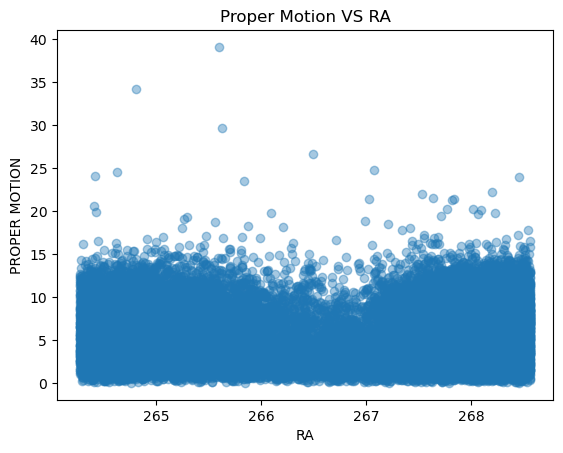

In [25]:
proper_motion = dataset['pm']

plt.scatter(ra , proper_motion, alpha=0.4)
plt.xlabel('RA')
plt.ylabel('PROPER MOTION')
plt.title('Proper Motion VS RA')
plt.show()

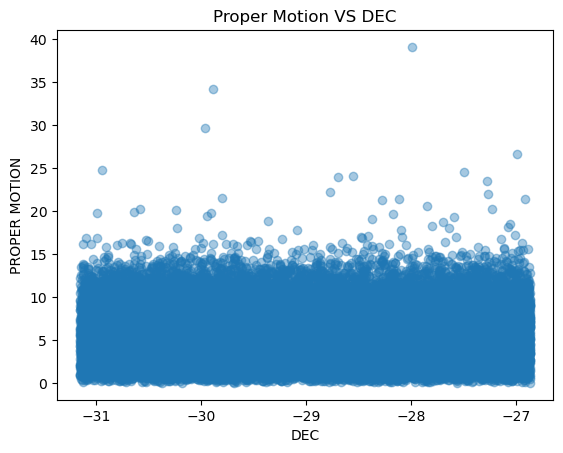

In [26]:
plt.scatter(dec , proper_motion, alpha=0.4)
plt.xlabel('DEC')
plt.ylabel('PROPER MOTION')
plt.title('Proper Motion VS DEC')

plt.show()


### #Make New cell for each new graph and add a subsequent Markdown cell for your comment

- Please label your graphs properly
- Make sure to add legends to the plots
- Add brief comments about what the graph speaks after each cell.


**Note: If you are not adding any new graph, please delete this cell and move to the Next section**

# 2. Data Cleaning and Interpretation

You have been provided with a few FITS files of a Pulsar. The pulsars are extremely faint radio source, hence on earth, where there is so much of radio noise coming off from TV broadcasts etc. it becomes tough to detect them in a single observation.

Scientists use a method called stacking which helps them detect these pulsars given enough observations about them. Each FITS file consists of a pulsar reading, which is invisible to the human eye when plotted. But if you stack all the images and take the mean of each pixel to create a new one, the noise being a random gaussian distribution cancels out and the Radio pulsar stars to become visible.

Your task here is to-

- Create a Mean stack of all the FITS images and plot the final results. Also mention the pixel number of the Pulsar detection and also make a circle around it in the image while plotting (This is bit tricky part hence leave if no feasible).

- Create a Median stack and repeat the same process. 

- Comment your observations about what stacking is better, Median or Mean. 

- Also, if I increase the dataset images to about a million (real life scenario), do you think any problem would occur? Suggest a few ways to overcome such problems if any.


The data for this exercise is provided in the folder named `Pulsar Data`

### MEAN STACK

[[-0.00124795  0.00099036  0.00298147 ... -0.00572637 -0.00027431
  -0.00078248]
 [ 0.00215523  0.00220999  0.00025068 ... -0.00391413 -0.00473062
  -0.00124445]
 [-0.00359211 -0.0011638   0.00068985 ... -0.00223992 -0.0058456
  -0.00312895]
 ...
 [-0.00739029 -0.00802433 -0.00550637 ... -0.0046488  -0.00568922
  -0.00199196]
 [-0.00813804 -0.00552435 -0.00391088 ... -0.00683829 -0.00459261
  -0.00350439]
 [-0.00850686 -0.00796224 -0.00301022 ... -0.00748809 -0.00778103
  -0.00268238]]


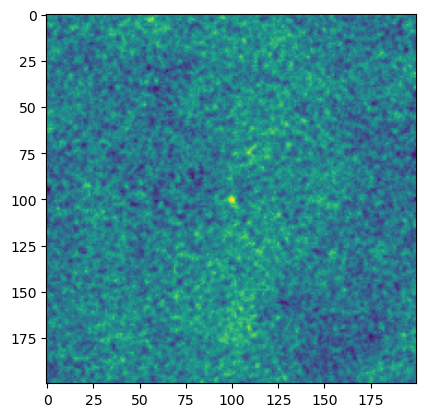

In [27]:
#Code for Mean Stack.
#first let us create a list of the name of fits files using the os module
path_fits = '/home/relativelyhuman/Desktop/IBAC_RG/Data/Pulsar_Data/'
image_list = os.listdir(path_fits)


#now we create a list of paths for the fits files 
path_fits_list = [path_fits + image for image in image_list]

#now we concatenate the data from each fits file.
image_concat = [fits.getdata(path_fits) for path_fits in path_fits_list]

#now we stack the images to form a final_image(sum_stack). For that we must initialise the final image as a base over which data from each fits file will be stacked

sum_stack = np.zeros(shape = image_concat[0].shape)

for image in image_concat:
    sum_stack = sum_stack + image

#for mean_stack we divide the sum_stack by 12 (no. of fits files)
mean_stack = sum_stack / 12

#let us plot the image
print(mean_stack)
plt.imshow(mean_stack , cmap='viridis')

BY EYE BALLING WE SEE THAT THE PULSAR IS LOCATED AT (100,100). HENCE,

In [28]:
x = 100
y = 100

pixel_value = mean_stack[x,y]

print('PIXEL VALUE OF PULSAR = ' + str(pixel_value))

PIXEL VALUE OF PULSAR = 0.014187764842063189


### MEDIAN STACK

[[-1.71077007e-03 -5.93052508e-04  2.40169652e-03 ... -5.05419658e-03
  -3.62747771e-04 -5.12249448e-04]
 [ 9.47124849e-04 -1.99547358e-05 -8.13750259e-04 ... -2.79890257e-03
  -3.24311492e-03 -8.23639839e-05]
 [-3.59907735e-03 -1.32042600e-03  2.56180749e-04 ... -1.53369526e-03
  -3.50235007e-03 -4.65185745e-04]
 ...
 [-4.64023417e-03 -4.78721294e-03 -5.26653137e-03 ... -3.61566944e-03
  -4.79442254e-03 -1.26243249e-05]
 [-7.19798659e-03 -3.64847097e-03 -2.55729142e-03 ... -5.85904717e-03
  -3.50968761e-03 -2.80861999e-03]
 [-4.82962630e-03 -5.10736089e-03 -1.76411372e-03 ... -6.78473059e-03
  -7.78344506e-03 -2.66287848e-03]]


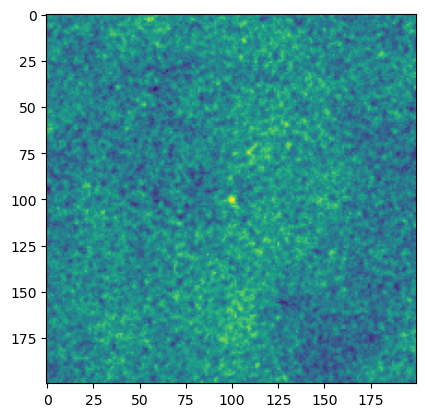

In [29]:
median_stack = np.median(image_concat, axis=0)
print(median_stack)

plt.imshow(median_stack, cmap = 'viridis')

There doesn't seem to be much difference in the image obtained after mean stack and median stack. I beleive the reason for this is the less number of fits files we are stacking together

#### Possible complications on stacking very large number fits files.

* Since here I am using a for loop to stack the fits files, when dealing with a large number of them the loop will run for a very long time. I don't know if we can somehow just bypass the for loop method but I think we can cut the time taken by each iteration of the for loop by creating a list of fits files and open them all at once and then just using the concatenate function in the for loop.

* With great number of files comes great data hence, it might be possible that we run out of memory in certain circumstances. One can overcome this hurdle by creating sets (or groups) of fits files. We stack the fits files in each of this sets first to get each a fits file from each set and then finally stack them together to create a final image.

* There could also be a case where may be a few hundreds or thousands among a million fits files are faulty i.e. they may contain error or no data at all. In such cases it would be important to check for those files and deal with them accordingly.

# 3. Data Interpretation

I hope you saw the code using which the Gaia data for the first task was downloaded. 

In this task you are supposed to download and create a dataset, from any telescope such as Gaia, Hubble, JWST (a bit tough), ALMA etc. You can even change the query code given above and select a different region of the sky. 

Create the dataset and make a visual interpretation of the data. Create at least 5 plots using the data set and describe the Physics they demonstrate as much as you can. 

This is an open end question hence there are no restrictions, although if you need any suggestions or ideas to begin with, I would highly reccommend to search GitHub/Kaggle as they provide a lot of innovative ideas about computational astronomy projects. 

In [30]:
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
from astroquery.gaia import Gaia
# we have successfully connected to the Gaia Archive. Our connection can be accesd via "Gaia"

# Let's see what Gaia have sth to offer.
tables = Gaia.load_tables(only_names = True) #Here we are importing only the names, not the data

for table in tables :
    print(table.name)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.apassdr9
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaia

In [32]:
# I am choosing the Gaia's 3rd Data release. Note that here we import only the meta data
meta = Gaia.load_table('gaiadr3.gaia_source')
print(meta)

Retrieving table 'gaiadr3.gaia_source'
TAP Table name: gaiadr3.gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 152


In [33]:
#Let's see the fields or parameters we have got.
for column in meta.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
scan_direction_strength_k1
scan_di

In [34]:
# I have chosen the region near the "Pleiades Star Cluster"
from astropy.coordinates import SkyCoord

SkyCoord.from_name('Pleiades')

<SkyCoord (ICRS): (ra, dec) in deg
    (56.601, 24.114)>

In [35]:
###This the Data Query
# Coordinates of Pleiades in icrs frame in degrees
p_ra = 56.601
p_dec = 24.114

#radius selection in degrees
r = 3

p1 = p_ra + r
p2 = p_ra - r
q1 = p_dec + r
q2 = p_dec - r
print(f'\nThe required RA values are between {p2} and {p1}')
print(f'The required DEC values are between {q2} and {q1}')

#Now I chose the following parameters..
#parameters = source_id , ra , dec, parallax, pm, teff_gspphot, phot_g_mean_mag, radial_velocity
query1 = f'''SELECT g.source_id , g.ra , g.dec, g.parallax, g.pm, g.teff_gspphot, g.phot_g_mean_flux, g.radial_velocity , g.parallax_over_error
FROM gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
WHERE g.source_id = h.source_id AND
g.ra BETWEEN {p2} AND {p1} AND
g.dec BETWEEN {q2} AND {q1} AND
g.parallax IS NOT NULL AND abs(g.parallax) > 0 AND g.parallax_over_error > 10'''

job = Gaia.launch_job_async(query1)
results = job.get_results()

print('\nTotal number of stars queried: ',len(results))


The required RA values are between 53.601 and 59.601
The required DEC values are between 21.114 and 27.114
INFO: Query finished. [astroquery.utils.tap.core]

Total number of stars queried:  42738


In [36]:
results = job.get_results()
results

source_id,ra,dec,parallax,pm,teff_gspphot,phot_g_mean_flux,radial_velocity,parallax_over_error
,deg,deg,mas,mas / yr,K,electron / s,km / s,
int64,float64,float64,float64,float32,float32,float64,float32,float32
58465504311747840,53.601084150992925,21.395555701578196,0.48334725285243996,7.31243,5150.122,10049.059758218697,--,11.483606
67668725873551104,53.60110900228629,22.881613058422545,0.8587884396020197,10.833273,5437.7266,5724.886841058434,--,15.584543
69258550968065920,53.60112263571454,24.99211230506751,1.7138240446869202,10.21925,--,345528.27299627353,0.2888427,103.10866
67569872906314880,53.60134139964972,22.412971519511267,0.38539432437128057,3.566264,4926.027,34062.49522284514,-22.990559,13.486194
58521682483959680,53.601612494839706,21.631226017907455,0.9353275746551217,14.226153,5087.795,6350.849898322621,--,19.402147
64547693398378240,53.60178379924327,21.975823301721352,1.2712307623489276,0.572661,5791.3804,41432.583724382835,64.13405,62.34177
...,...,...,...,...,...,...,...,...
51500785345198848,59.60031351519791,21.17691423211098,4.10488193609471,27.430956,4257.556,67115.31969778592,-1.2745769,221.58372


In [37]:
dataset1 = results.to_pandas() # We have uploaded our data from Gaia on pandas data framework

### #Please describe your dataset here

## RA vs DEC

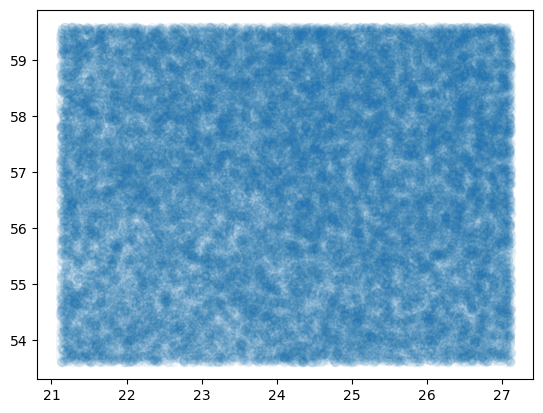

In [38]:
ra1 = dataset1["ra"]
dec1 = dataset1["dec"]

plt.scatter(dec1,ra1 , alpha=0.05)
plt.show()

Same as above this plot shows how the night sky looks near the region of the Pleiades Star Cluster.

## Temperature Distribution

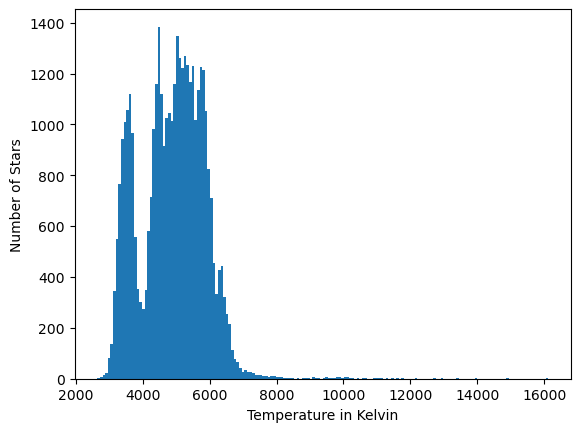

In [39]:
Temp = dataset1["teff_gspphot"]

plt.hist(Temp , bins='auto')
plt.xlabel('Temperature in Kelvin')
plt.ylabel('Number of Stars')
plt.show()

This is a distribution of Temperature in the region considered here...
I think it gives information about the spectrum of light received from different stars.

## Flux vs Temperature

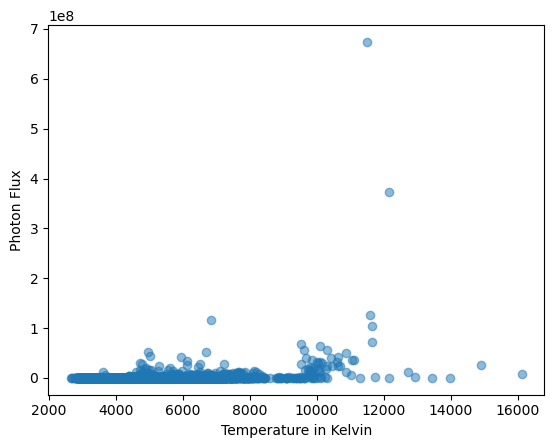

In [40]:
phot_flux = dataset1['phot_g_mean_flux']

plt.scatter(Temp, phot_flux , alpha=0.5)
plt.xlabel('Temperature in Kelvin')
plt.ylabel('Photon Flux')
plt.show()

## Distance Distribution

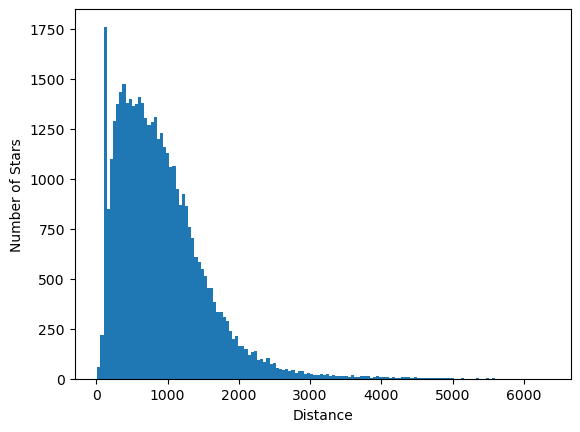

In [41]:
parallax = dataset1['parallax']

distance = 1 / (parallax * 0.001)
plt.hist(distance , bins = 'auto')
plt.xlabel('Distance')
plt.ylabel('Number of Stars')
plt.show()

## Luminosity vs Temperature

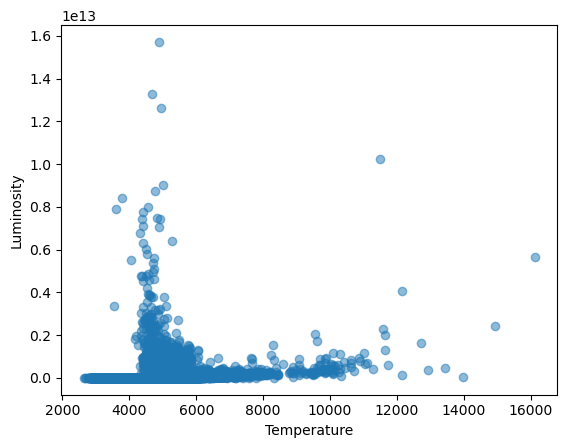

In [42]:
luminosity = (distance) * (distance) * (phot_flux)

plt.scatter(Temp, luminosity , alpha = 0.5)
plt.xlabel('Temperature')
plt.ylabel('Luminosity')
plt.show()

The reason I made this plot is because I think it gives information about the HR Diagram of the region which is useful to understand the evolution of the stars